<a href="https://colab.research.google.com/github/joeyave/machine-learning-project5/blob/main/machine_learning_project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
import pandas as pd
from copy import deepcopy

import seaborn as sns; sns.set()
import numpy as np

def calinski_harabasz_index(X, labels):
    n_samples, _ = X.shape
    n_labels = len(set(labels))

    bcsm, wcsm = 0., 0.
    mean = np.mean(X, axis=0)

    for k in range(n_labels):
        cluster_k = X[labels == k]
        mean_k = np.mean(cluster_k, axis=0)
        bcsm += len(cluster_k) * np.sum((mean_k - mean) ** 2)
        wcsm += np.sum((cluster_k - mean_k) ** 2)

    if wcsm == 0.:
        return 1.
    else:
        return bcsm * (n_samples - n_labels) / (wcsm * (n_labels - 1.))

def normalize(df): 
  df_norm = deepcopy(df)
  df_num_norm = (df - df.min()) / (df.max() - df.min())
  df_norm[df_num_norm.columns] = df_num_norm
  return np.array(df_norm)

from sklearn.metrics import pairwise_distances_argmin

def KMeans(X, n_clusters, debug=False):
    # 1. Randomly choose clusters.
    i = np.random.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    if debug == True:
      print('init centers: ' + str(centers))
    
    while True:
        # 2a. Assign labels based on closest center.
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points.
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c. Check for convergence.
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

FILE PATH: /content/drive/My Drive/Colab Notebooks/data-project5/1.txt

INPUT DATA


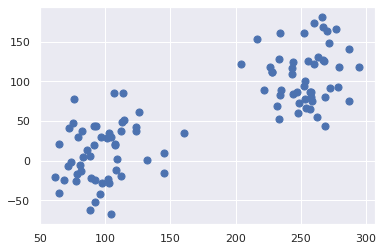


DATA AFTER CLUSTERIZATION

ITERATION 0
init centers: [[0.04726616 0.43501931]
 [0.83944177 0.59250594]]


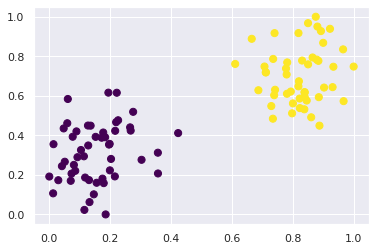

label: 1 - dot: [0.71131207 0.71817381]
label: 1 - dot: [0.79774132 0.51142143]
label: 0 - dot: [0.0508541  0.26650371]
label: 1 - dot: [0.71166941 0.71910563]
label: 1 - dot: [0.83944177 0.59250594]
label: 1 - dot: [0.93081161 0.64390379]
...

ITERATION 1
init centers: [[0.13583943 0.44899582]
 [0.19911206 0.22296735]]


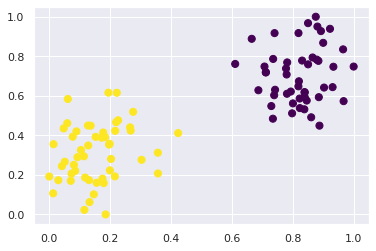

label: 0 - dot: [0.71131207 0.71817381]
label: 0 - dot: [0.79774132 0.51142143]
label: 1 - dot: [0.0508541  0.26650371]
label: 0 - dot: [0.71166941 0.71910563]
label: 0 - dot: [0.83944177 0.59250594]
label: 0 - dot: [0.93081161 0.64390379]
...

ITERATION 2
init centers: [[0.1153277  0.0228533 ]
 [0.83058847 0.77838504]]


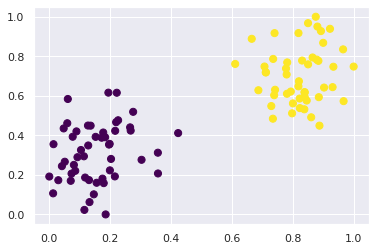

label: 1 - dot: [0.71131207 0.71817381]
label: 1 - dot: [0.79774132 0.51142143]
label: 0 - dot: [0.0508541  0.26650371]
label: 1 - dot: [0.71166941 0.71910563]
label: 1 - dot: [0.83944177 0.59250594]
label: 1 - dot: [0.93081161 0.64390379]
...

best cluster index: 0

best cluster score: 63.99435913942649

CALINSKI HARABASZ INDEX
my metric: 522.6223458960479 - sklearn metric: 522.6223458960479
my metric: 380.246048201983 - sklearn metric: 380.246048201983
my metric: 401.63565777878574 - sklearn metric: 401.63565777878574
my metric: 349.21093972103773 - sklearn metric: 349.21093972103773
my metric: 323.3099842922411 - sklearn metric: 323.3099842922411
my metric: 295.183094072483 - sklearn metric: 295.183094072483
my metric: 239.21875699922296 - sklearn metric: 239.21875699922296
my metric: 273.07833738406003 - sklearn metric: 273.07833738406003


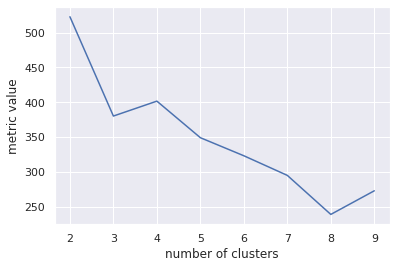

FILE PATH: /content/drive/My Drive/Colab Notebooks/data-project5/2.txt

INPUT DATA


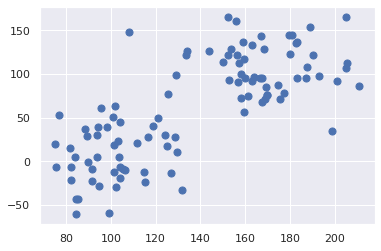


DATA AFTER CLUSTERIZATION

ITERATION 0
init centers: [[0.4292523  0.80415969]
 [0.62244653 0.51795692]]


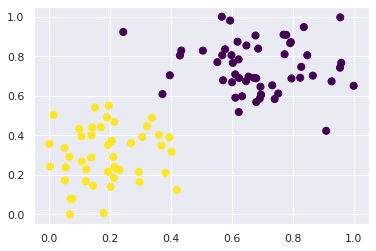

label: 0 - dot: [0.83643146 0.94785831]
label: 0 - dot: [1.         0.65050867]
label: 1 - dot: [0.01409212 0.50356007]
label: 0 - dot: [0.79369278 0.87159939]
label: 1 - dot: [0.05035823 0.3363216 ]
label: 0 - dot: [0.50452388 0.8284419 ]
...

ITERATION 1
init centers: [[0.69128088 0.58546323]
 [0.41853192 0.12417096]]


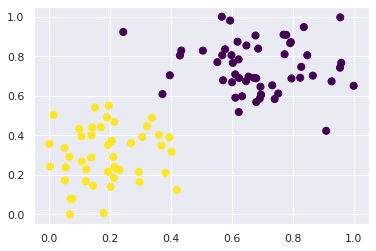

label: 0 - dot: [0.83643146 0.94785831]
label: 0 - dot: [1.         0.65050867]
label: 1 - dot: [0.01409212 0.50356007]
label: 0 - dot: [0.79369278 0.87159939]
label: 1 - dot: [0.05035823 0.3363216 ]
label: 0 - dot: [0.50452388 0.8284419 ]
...

ITERATION 2
init centers: [[0.29696146 0.16401849]
 [0.39429366 0.39000182]]


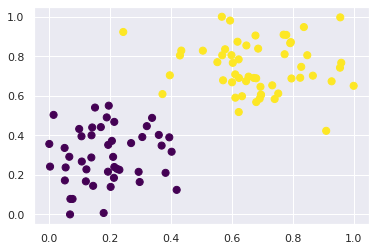

label: 1 - dot: [0.83643146 0.94785831]
label: 1 - dot: [1.         0.65050867]
label: 0 - dot: [0.01409212 0.50356007]
label: 1 - dot: [0.79369278 0.87159939]
label: 0 - dot: [0.05035823 0.3363216 ]
label: 1 - dot: [0.50452388 0.8284419 ]
...

best cluster index: 0

best cluster score: 117.18155758068596

CALINSKI HARABASZ INDEX
my metric: 297.99672586881246 - sklearn metric: 297.99672586881246
my metric: 195.54762878418163 - sklearn metric: 195.54762878418163
my metric: 145.74638352435906 - sklearn metric: 145.74638352435906
my metric: 147.3892211339404 - sklearn metric: 147.3892211339404
my metric: 171.06196767965392 - sklearn metric: 171.06196767965392
my metric: 173.84434880744817 - sklearn metric: 173.84434880744817
my metric: 102.18043369365542 - sklearn metric: 102.18043369365542
my metric: 145.4519981014588 - sklearn metric: 145.4519981014588


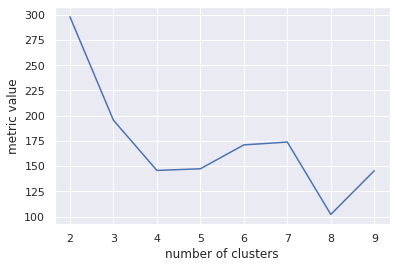

FILE PATH: /content/drive/My Drive/Colab Notebooks/data-project5/3.txt

INPUT DATA


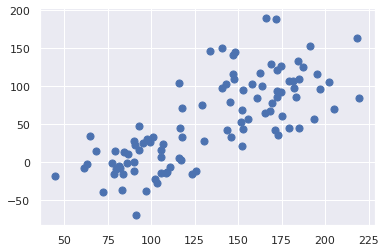


DATA AFTER CLUSTERIZATION

ITERATION 0
init centers: [[0.26620859 0.        ]
 [0.63255508 0.49001748]]


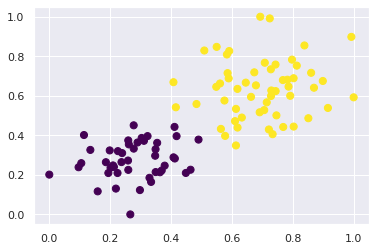

label: 1 - dot: [1.         0.59239044]
label: 0 - dot: [0.21879942 0.13061668]
label: 0 - dot: [0.26136623 0.35423435]
label: 1 - dot: [0.40794689 0.66894922]
label: 0 - dot: [0.25945569 0.37436019]
label: 0 - dot: [0.41142621 0.44275735]
...

ITERATION 1
init centers: [[0.34942195 0.21423687]
 [0.32284013 0.3962179 ]]


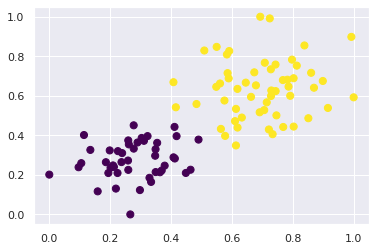

label: 1 - dot: [1.         0.59239044]
label: 0 - dot: [0.21879942 0.13061668]
label: 0 - dot: [0.26136623 0.35423435]
label: 1 - dot: [0.40794689 0.66894922]
label: 0 - dot: [0.25945569 0.37436019]
label: 0 - dot: [0.41142621 0.44275735]
...

ITERATION 2
init centers: [[0.10514371 0.25937063]
 [0.86025854 0.71641312]]


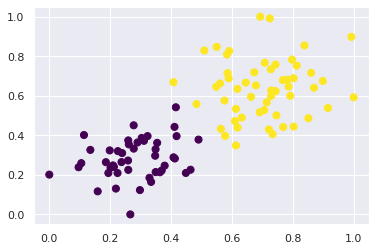

label: 1 - dot: [1.         0.59239044]
label: 0 - dot: [0.21879942 0.13061668]
label: 0 - dot: [0.26136623 0.35423435]
label: 1 - dot: [0.40794689 0.66894922]
label: 0 - dot: [0.25945569 0.37436019]
label: 0 - dot: [0.41142621 0.44275735]
...

best cluster index: 2

best cluster score: 108.1369420784684

CALINSKI HARABASZ INDEX
my metric: 248.23087143203972 - sklearn metric: 248.23087143203972
my metric: 157.6398391074424 - sklearn metric: 157.6398391074424
my metric: 155.62173509704093 - sklearn metric: 155.62173509704093
my metric: 125.53043565353097 - sklearn metric: 125.53043565353097
my metric: 143.79299968497145 - sklearn metric: 143.79299968497145
my metric: 146.13650862688627 - sklearn metric: 146.13650862688627
my metric: 109.09101961132171 - sklearn metric: 109.09101961132171
my metric: 124.42441856541888 - sklearn metric: 124.42441856541888


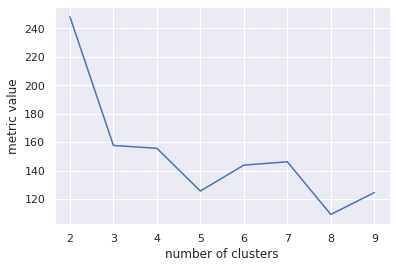

FILE PATH: /content/drive/My Drive/Colab Notebooks/data-project5/4.txt

INPUT DATA


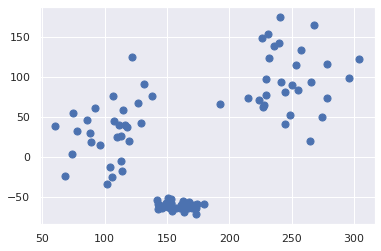


DATA AFTER CLUSTERIZATION

ITERATION 0
init centers: [[0.45005407 0.03977318]
 [0.84957564 0.95651285]]


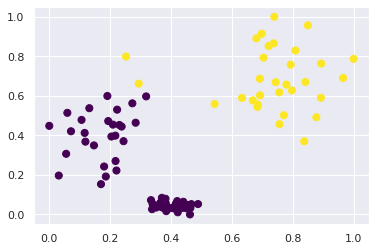

label: 0 - dot: [0.03115148 0.19669086]
label: 1 - dot: [0.79720498 0.62726766]
label: 1 - dot: [0.7039262  0.79320318]
label: 0 - dot: [0.27287603 0.56197503]
label: 0 - dot: [0.        0.4481192]
label: 0 - dot: [0.42206335 0.01082262]
...

ITERATION 1
init centers: [[0.36372701 0.04977556]
 [0.24392877 0.3705229 ]]


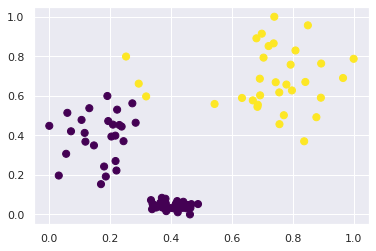

label: 0 - dot: [0.03115148 0.19669086]
label: 1 - dot: [0.79720498 0.62726766]
label: 1 - dot: [0.7039262  0.79320318]
label: 0 - dot: [0.27287603 0.56197503]
label: 0 - dot: [0.        0.4481192]
label: 0 - dot: [0.42206335 0.01082262]
...

ITERATION 2
init centers: [[0.42027189 0.06749641]
 [0.33765142 0.02650965]]


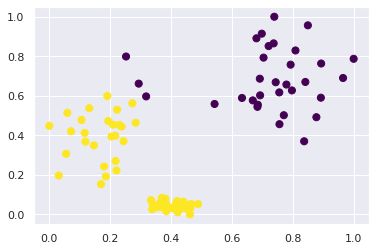

label: 1 - dot: [0.03115148 0.19669086]
label: 0 - dot: [0.79720498 0.62726766]
label: 0 - dot: [0.7039262  0.79320318]
label: 1 - dot: [0.27287603 0.56197503]
label: 1 - dot: [0.        0.4481192]
label: 1 - dot: [0.42206335 0.01082262]
...

best cluster index: 1

best cluster score: 235.19163219933841

CALINSKI HARABASZ INDEX
my metric: 178.68782552888018 - sklearn metric: 178.68782552888018
my metric: 323.6196545793336 - sklearn metric: 323.6196545793336
my metric: 308.63827933959516 - sklearn metric: 308.63827933959516
my metric: 261.06085652507534 - sklearn metric: 261.06085652507534
my metric: 301.06392169232123 - sklearn metric: 301.06392169232123
my metric: 229.45409558648166 - sklearn metric: 229.45409558648166
my metric: 119.5039649462693 - sklearn metric: 119.5039649462693
my metric: 240.35800766568715 - sklearn metric: 240.35800766568715


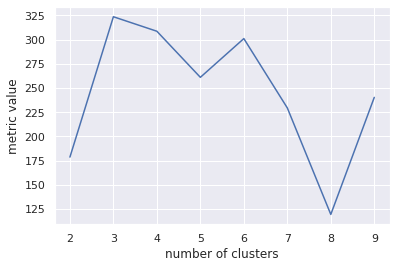

FILE PATH: /content/drive/My Drive/Colab Notebooks/data-project5/5.txt

INPUT DATA


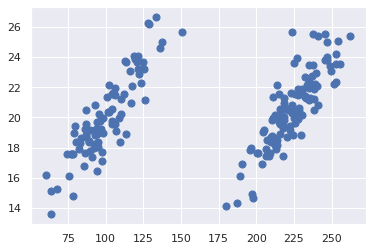


DATA AFTER CLUSTERIZATION

ITERATION 0
init centers: [[0.77857178 0.29485498]
 [0.76655354 0.61038001]]


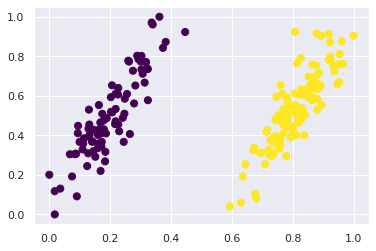

label: 1 - dot: [0.63655292 0.19255696]
label: 1 - dot: [0.83766868 0.39931074]
label: 0 - dot: [0.32020679 0.74087346]
label: 1 - dot: [0.91777225 0.91265363]
label: 1 - dot: [0.87657791 0.75411723]
label: 0 - dot: [0.12453468 0.2445561 ]
...

ITERATION 1
init centers: [[0.14181436 0.36898808]
 [0.25954868 0.7779057 ]]


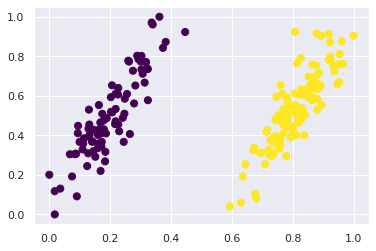

label: 1 - dot: [0.63655292 0.19255696]
label: 1 - dot: [0.83766868 0.39931074]
label: 0 - dot: [0.32020679 0.74087346]
label: 1 - dot: [0.91777225 0.91265363]
label: 1 - dot: [0.87657791 0.75411723]
label: 0 - dot: [0.12453468 0.2445561 ]
...

ITERATION 2
init centers: [[0.38235976 0.87272408]
 [0.82861441 0.60623227]]


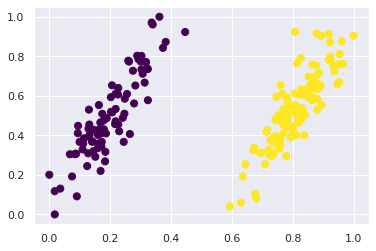

label: 1 - dot: [0.63655292 0.19255696]
label: 1 - dot: [0.83766868 0.39931074]
label: 0 - dot: [0.32020679 0.74087346]
label: 1 - dot: [0.91777225 0.91265363]
label: 1 - dot: [0.87657791 0.75411723]
label: 0 - dot: [0.12453468 0.2445561 ]
...

best cluster index: 0

best cluster score: 542.304804603279

CALINSKI HARABASZ INDEX
my metric: 392.01189640521375 - sklearn metric: 392.01189640521375
my metric: 336.3262422252634 - sklearn metric: 336.3262422252634
my metric: 489.4779820571139 - sklearn metric: 489.4779820571139
my metric: 485.93600544438374 - sklearn metric: 485.93600544438374
my metric: 395.52008897166536 - sklearn metric: 395.52008897166536
my metric: 523.1516343127813 - sklearn metric: 523.1516343127813
my metric: 380.20855633439794 - sklearn metric: 380.20855633439794
my metric: 500.2374720049089 - sklearn metric: 500.2374720049089


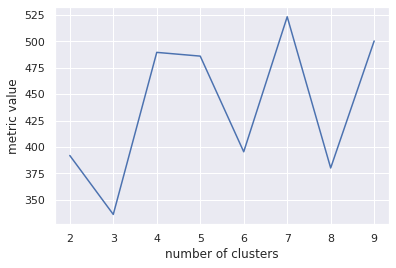

FILE PATH: /content/drive/My Drive/Colab Notebooks/data-project5/6.txt

INPUT DATA


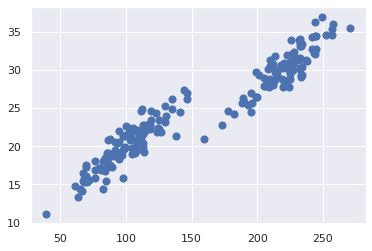


DATA AFTER CLUSTERIZATION

ITERATION 0
init centers: [[0.69913567 0.70412584]
 [0.26179503 0.44613941]]


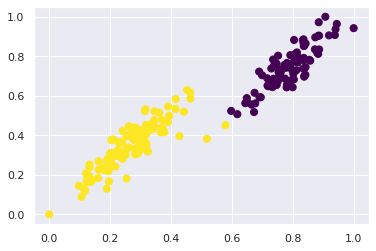

label: 1 - dot: [0.39398444 0.49900387]
label: 1 - dot: [0.26307959 0.4019467 ]
label: 0 - dot: [0.93831215 0.90746017]
label: 0 - dot: [0.78081814 0.76626821]
label: 1 - dot: [0.17675078 0.23585918]
label: 0 - dot: [0.73539249 0.78343797]
...

ITERATION 1
init centers: [[0.73330966 0.64377881]
 [0.25698515 0.39549115]]


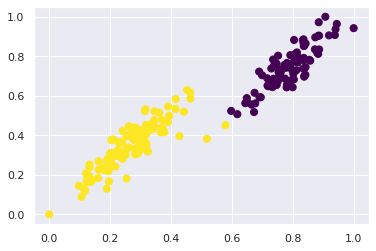

label: 1 - dot: [0.39398444 0.49900387]
label: 1 - dot: [0.26307959 0.4019467 ]
label: 0 - dot: [0.93831215 0.90746017]
label: 0 - dot: [0.78081814 0.76626821]
label: 1 - dot: [0.17675078 0.23585918]
label: 0 - dot: [0.73539249 0.78343797]
...

ITERATION 2
init centers: [[0.31752522 0.45345596]
 [0.21828996 0.30655362]]


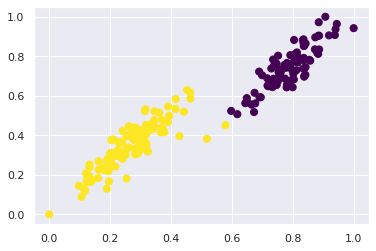

label: 1 - dot: [0.39398444 0.49900387]
label: 1 - dot: [0.26307959 0.4019467 ]
label: 0 - dot: [0.93831215 0.90746017]
label: 0 - dot: [0.78081814 0.76626821]
label: 1 - dot: [0.17675078 0.23585918]
label: 0 - dot: [0.73539249 0.78343797]
...

best cluster index: 0

best cluster score: 293.1104116104766

CALINSKI HARABASZ INDEX
my metric: 985.0007813375626 - sklearn metric: 985.0007813375626
my metric: 688.9986587352245 - sklearn metric: 688.9986587352245
my metric: 729.8132384417459 - sklearn metric: 729.8132384417459
my metric: 944.1850209063359 - sklearn metric: 944.1850209063359
my metric: 855.4689761134848 - sklearn metric: 855.4689761134848
my metric: 1005.8553223120185 - sklearn metric: 1005.8553223120185
my metric: 964.2598829149526 - sklearn metric: 964.2598829149526
my metric: 1012.1969494159465 - sklearn metric: 1012.1969494159465


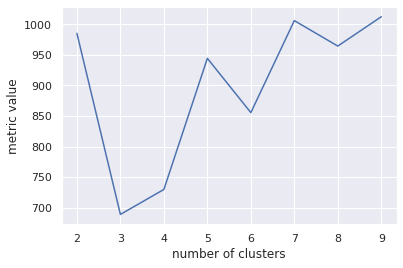

FILE PATH: /content/drive/My Drive/Colab Notebooks/data-project5/7.txt

INPUT DATA


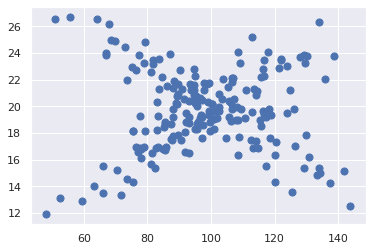


DATA AFTER CLUSTERIZATION

ITERATION 0
init centers: [[0.89099519 0.19830692]
 [0.56913757 0.60700937]]


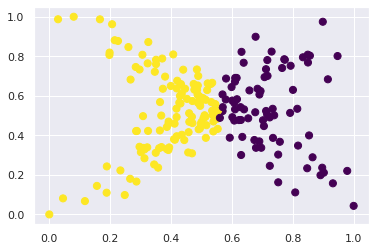

label: 1 - dot: [0.44600669 0.63587385]
label: 0 - dot: [0.97884696 0.22016742]
label: 0 - dot: [0.56936023 0.52263835]
label: 1 - dot: [0.50005436 0.46754261]
label: 0 - dot: [0.73396299 0.53438348]
label: 1 - dot: [0.30096697 0.31470095]
...

ITERATION 1
init centers: [[0.62957663 0.4777994 ]
 [0.60759565 0.56431203]]


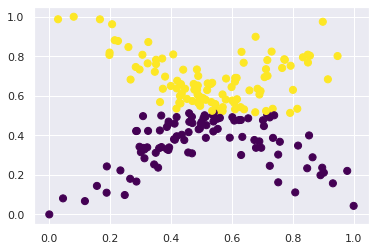

label: 1 - dot: [0.44600669 0.63587385]
label: 0 - dot: [0.97884696 0.22016742]
label: 1 - dot: [0.56936023 0.52263835]
label: 0 - dot: [0.50005436 0.46754261]
label: 1 - dot: [0.73396299 0.53438348]
label: 0 - dot: [0.30096697 0.31470095]
...

ITERATION 2
init centers: [[0.69636212 0.33716756]
 [0.60146665 0.49185451]]


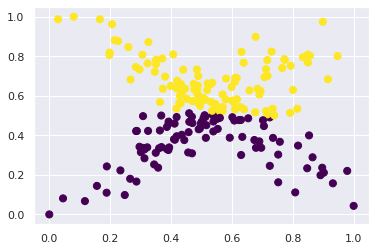

label: 1 - dot: [0.44600669 0.63587385]
label: 0 - dot: [0.97884696 0.22016742]
label: 1 - dot: [0.56936023 0.52263835]
label: 0 - dot: [0.50005436 0.46754261]
label: 1 - dot: [0.73396299 0.53438348]
label: 0 - dot: [0.30096697 0.31470095]
...

best cluster index: 1

best cluster score: 533.5527514043689

CALINSKI HARABASZ INDEX
my metric: 94.07833667700271 - sklearn metric: 94.07833667700271
my metric: 107.90811012531934 - sklearn metric: 107.90811012531934
my metric: 134.16773047258093 - sklearn metric: 134.16773047258093
my metric: 174.14469772296158 - sklearn metric: 174.14469772296158
my metric: 176.0338142168069 - sklearn metric: 176.0338142168069
my metric: 165.3937011646979 - sklearn metric: 165.3937011646979
my metric: 197.12552384270006 - sklearn metric: 197.12552384270006
my metric: 208.82336083087023 - sklearn metric: 208.82336083087023


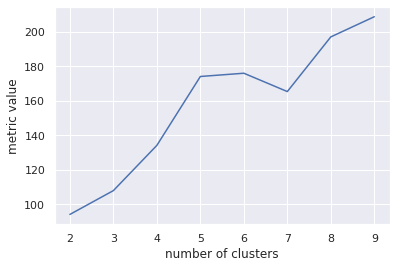

FILE PATH: /content/drive/My Drive/Colab Notebooks/data-project5/8.txt

INPUT DATA


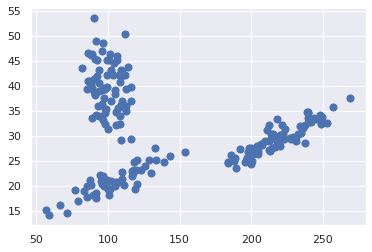


DATA AFTER CLUSTERIZATION

ITERATION 0
init centers: [[0.28991577 0.22765305]
 [0.38925072 0.26883602]]


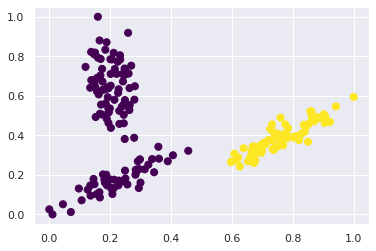

label: 1 - dot: [0.88599473 0.48795258]
label: 0 - dot: [0.14311173 0.67786659]
label: 0 - dot: [0.38925072 0.26883602]
label: 0 - dot: [0.21509449 0.73577105]
label: 0 - dot: [0.10626676 0.07142225]
label: 1 - dot: [0.7714768 0.3882861]
...

ITERATION 1
init centers: [[0.26910855 0.75245715]
 [0.29514278 0.22927134]]


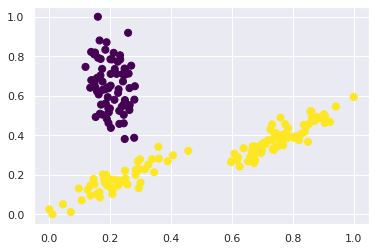

label: 1 - dot: [0.88599473 0.48795258]
label: 0 - dot: [0.14311173 0.67786659]
label: 1 - dot: [0.38925072 0.26883602]
label: 0 - dot: [0.21509449 0.73577105]
label: 1 - dot: [0.10626676 0.07142225]
label: 1 - dot: [0.7714768 0.3882861]
...

ITERATION 2
init centers: [[0.15682221 0.62222014]
 [0.28311825 0.20052645]]


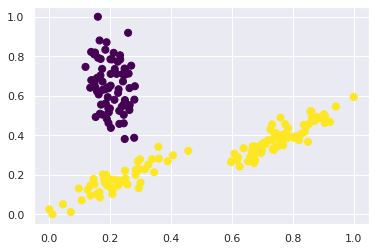

label: 1 - dot: [0.88599473 0.48795258]
label: 0 - dot: [0.14311173 0.67786659]
label: 1 - dot: [0.38925072 0.26883602]
label: 0 - dot: [0.21509449 0.73577105]
label: 1 - dot: [0.10626676 0.07142225]
label: 1 - dot: [0.7714768 0.3882861]
...

best cluster index: 0

best cluster score: 80.35288728907426

CALINSKI HARABASZ INDEX
my metric: 286.09132647810605 - sklearn metric: 286.09132647810605
my metric: 677.3715106073236 - sklearn metric: 677.3715106073236
my metric: 550.3736386020187 - sklearn metric: 550.3736386020187
my metric: 494.91908329708923 - sklearn metric: 494.91908329708923
my metric: 623.7840879082797 - sklearn metric: 623.7840879082797
my metric: 526.8381917636617 - sklearn metric: 526.8381917636617
my metric: 760.8846856840065 - sklearn metric: 760.8846856840065
my metric: 578.251382048629 - sklearn metric: 578.251382048629


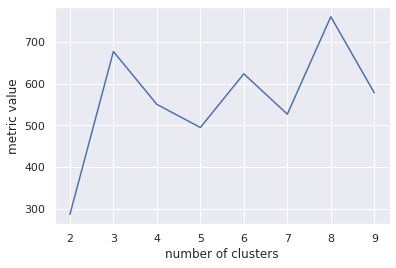

FILE PATH: /content/drive/My Drive/Colab Notebooks/data-project5/9.txt

INPUT DATA


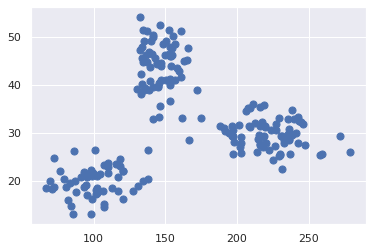


DATA AFTER CLUSTERIZATION

ITERATION 0
init centers: [[0.83749581 0.46651   ]
 [0.15400199 0.20946775]]


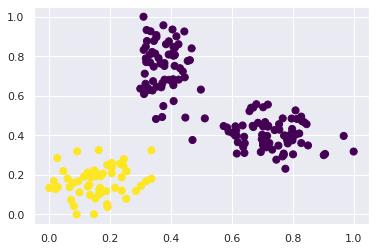

label: 0 - dot: [0.32446625 0.63825304]
label: 0 - dot: [0.73249961 0.32767734]
label: 0 - dot: [0.40417061 0.81367548]
label: 0 - dot: [0.51100798 0.48566762]
label: 1 - dot: [0.20518149 0.26027204]
label: 0 - dot: [0.61408763 0.42564541]
...

ITERATION 1
init centers: [[0.3923751  0.80876152]
 [0.13659863 0.18767331]]


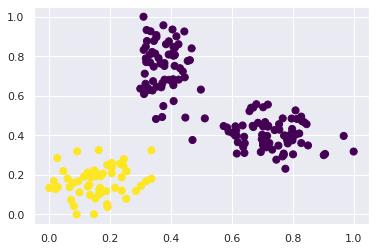

label: 0 - dot: [0.32446625 0.63825304]
label: 0 - dot: [0.73249961 0.32767734]
label: 0 - dot: [0.40417061 0.81367548]
label: 0 - dot: [0.51100798 0.48566762]
label: 1 - dot: [0.20518149 0.26027204]
label: 0 - dot: [0.61408763 0.42564541]
...

ITERATION 2
init centers: [[0.84530563 0.45668694]
 [0.33289121 0.92640972]]


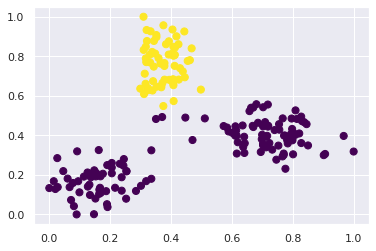

label: 1 - dot: [0.32446625 0.63825304]
label: 0 - dot: [0.73249961 0.32767734]
label: 1 - dot: [0.40417061 0.81367548]
label: 0 - dot: [0.51100798 0.48566762]
label: 0 - dot: [0.20518149 0.26027204]
label: 0 - dot: [0.61408763 0.42564541]
...

best cluster index: 2

best cluster score: 52.062309832984916

CALINSKI HARABASZ INDEX
my metric: 229.43184371921598 - sklearn metric: 229.43184371921598
my metric: 769.3620671426439 - sklearn metric: 769.3620671426439
my metric: 633.7745636099737 - sklearn metric: 633.7745636099737
my metric: 654.7287103348624 - sklearn metric: 654.7287103348624
my metric: 507.78522653864786 - sklearn metric: 507.78522653864786
my metric: 434.3219388751072 - sklearn metric: 434.3219388751072
my metric: 522.9404633915649 - sklearn metric: 522.9404633915649
my metric: 519.5289969880725 - sklearn metric: 519.5289969880725


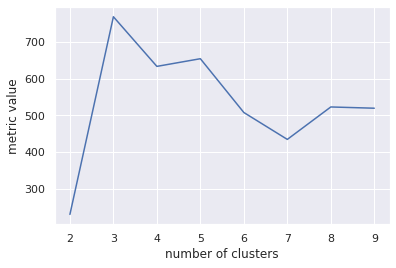

FILE PATH: /content/drive/My Drive/Colab Notebooks/data-project5/10.txt

INPUT DATA


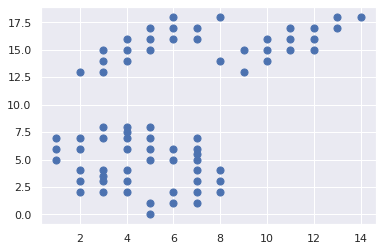


DATA AFTER CLUSTERIZATION

ITERATION 0
init centers: [[0.15384615 0.19444444]
 [0.76923077 0.94444444]]


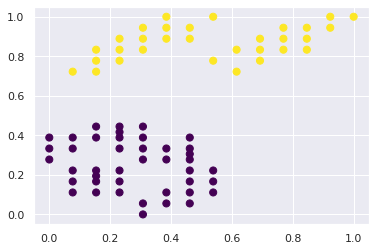

label: 0 - dot: [0.         0.27777778]
label: 0 - dot: [0.         0.33333333]
label: 0 - dot: [0.         0.38888889]
label: 0 - dot: [0.07692308 0.11111111]
label: 0 - dot: [0.07692308 0.16666667]
label: 0 - dot: [0.07692308 0.22222222]
...

ITERATION 1
init centers: [[0.07692308 0.38888889]
 [0.30769231 0.38888889]]


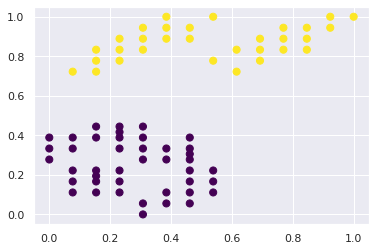

label: 0 - dot: [0.         0.27777778]
label: 0 - dot: [0.         0.33333333]
label: 0 - dot: [0.         0.38888889]
label: 0 - dot: [0.07692308 0.11111111]
label: 0 - dot: [0.07692308 0.16666667]
label: 0 - dot: [0.07692308 0.22222222]
...

ITERATION 2
init centers: [[0.30769231 0.44444444]
 [0.76923077 0.83333333]]


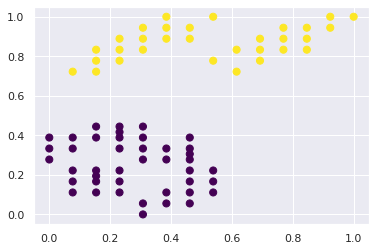

label: 0 - dot: [0.         0.27777778]
label: 0 - dot: [0.         0.33333333]
label: 0 - dot: [0.         0.38888889]
label: 0 - dot: [0.07692308 0.11111111]
label: 0 - dot: [0.07692308 0.16666667]
label: 0 - dot: [0.07692308 0.22222222]
...

best cluster index: 0

best cluster score: 71.56346793045512

CALINSKI HARABASZ INDEX
my metric: 137.5598022592291 - sklearn metric: 137.5598022592291
my metric: 102.10602291370974 - sklearn metric: 102.10602291370974
my metric: 158.7436293312585 - sklearn metric: 158.7436293312585
my metric: 144.93999956778094 - sklearn metric: 144.93999956778094
my metric: 143.58602236811257 - sklearn metric: 143.58602236811257
my metric: 120.25035089342127 - sklearn metric: 120.25035089342127
my metric: 154.65866353911687 - sklearn metric: 154.65866353911687
my metric: 101.57713710811599 - sklearn metric: 101.57713710811599


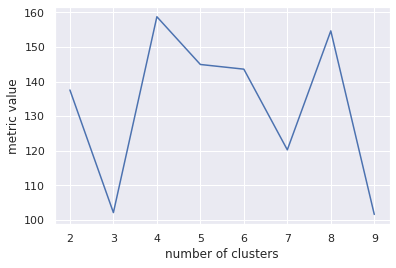

FILE PATH: /content/drive/My Drive/Colab Notebooks/data-project5/11.txt

INPUT DATA


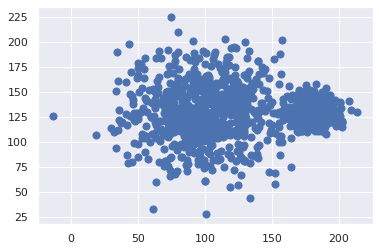


DATA AFTER CLUSTERIZATION

ITERATION 0
init centers: [[0.37793197 0.43565589]
 [0.50661315 0.6177495 ]]


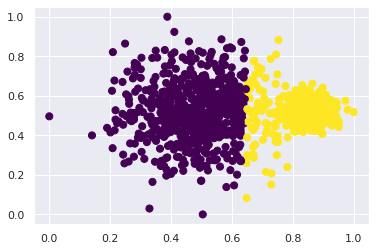

label: 1 - dot: [0.80338415 0.42158177]
label: 0 - dot: [0.387661   0.55662221]
label: 0 - dot: [0.51422561 0.68352348]
label: 0 - dot: [0.4253844  0.51068785]
label: 0 - dot: [0.59870998 0.60556956]
label: 0 - dot: [0.48380306 0.55989518]
...

ITERATION 1
init centers: [[0.84320695 0.5764148 ]
 [0.2599754  0.59831299]]


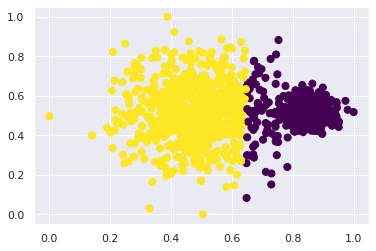

label: 0 - dot: [0.80338415 0.42158177]
label: 1 - dot: [0.387661   0.55662221]
label: 1 - dot: [0.51422561 0.68352348]
label: 1 - dot: [0.4253844  0.51068785]
label: 1 - dot: [0.59870998 0.60556956]
label: 1 - dot: [0.48380306 0.55989518]
...

ITERATION 2
init centers: [[0.33879841 0.41793451]
 [0.65876945 0.63564436]]


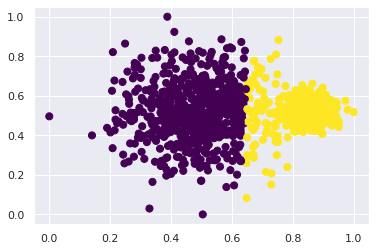

label: 1 - dot: [0.80338415 0.42158177]
label: 0 - dot: [0.387661   0.55662221]
label: 0 - dot: [0.51422561 0.68352348]
label: 0 - dot: [0.4253844  0.51068785]
label: 0 - dot: [0.59870998 0.60556956]
label: 0 - dot: [0.48380306 0.55989518]
...

best cluster index: 0

best cluster score: 1886.328100001301

CALINSKI HARABASZ INDEX
my metric: 1115.6924983263332 - sklearn metric: 1115.6924983263332
my metric: 1116.5836188615394 - sklearn metric: 1116.5836188615394
my metric: 1088.767008829179 - sklearn metric: 1088.767008829179
my metric: 1086.8204824783882 - sklearn metric: 1086.8204824783882
my metric: 999.0058922724103 - sklearn metric: 999.0058922724103
my metric: 951.1701990220421 - sklearn metric: 951.1701990220421
my metric: 967.54375407644 - sklearn metric: 967.54375407644
my metric: 874.0022391786504 - sklearn metric: 874.0022391786504


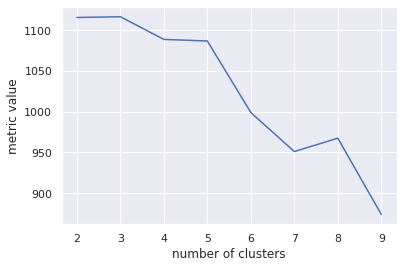

FILE PATH: /content/drive/My Drive/Colab Notebooks/data-project5/12.txt

INPUT DATA


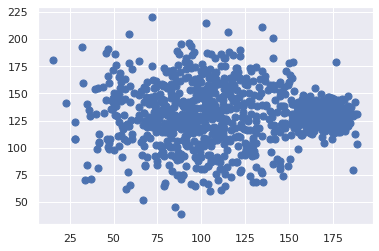


DATA AFTER CLUSTERIZATION

ITERATION 0
init centers: [[0.88864751 0.4680783 ]
 [0.50598369 0.81605767]]


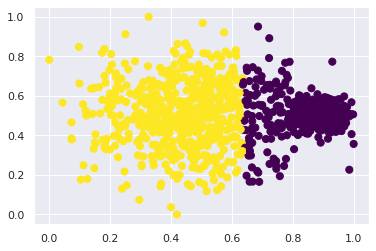

label: 1 - dot: [0.63225317 0.65750137]
label: 0 - dot: [0.98690374 0.50772424]
label: 1 - dot: [0.55933847 0.55825867]
label: 1 - dot: [0.61862188 0.30273362]
label: 1 - dot: [0.50598369 0.81605767]
label: 1 - dot: [0.53333622 0.54800451]
...

ITERATION 1
init centers: [[0.58818022 0.2672372 ]
 [0.95293592 0.47384383]]


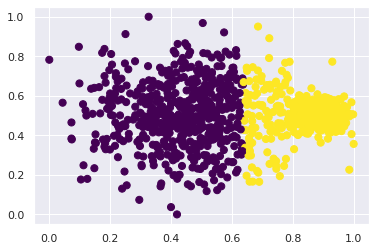

label: 0 - dot: [0.63225317 0.65750137]
label: 1 - dot: [0.98690374 0.50772424]
label: 0 - dot: [0.55933847 0.55825867]
label: 0 - dot: [0.61862188 0.30273362]
label: 0 - dot: [0.50598369 0.81605767]
label: 0 - dot: [0.53333622 0.54800451]
...

ITERATION 2
init centers: [[0.45710695 0.47212904]
 [0.91550997 0.44936487]]


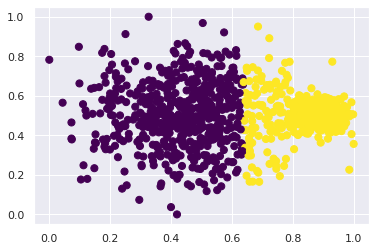

label: 0 - dot: [0.63225317 0.65750137]
label: 1 - dot: [0.98690374 0.50772424]
label: 0 - dot: [0.55933847 0.55825867]
label: 0 - dot: [0.61862188 0.30273362]
label: 0 - dot: [0.50598369 0.81605767]
label: 0 - dot: [0.53333622 0.54800451]
...

best cluster index: 0

best cluster score: 14266.505699795951

CALINSKI HARABASZ INDEX
my metric: 1299.0440371075447 - sklearn metric: 1299.0440371075447
my metric: 1175.6072899398837 - sklearn metric: 1175.6072899398837
my metric: 1213.4982184021067 - sklearn metric: 1213.4982184021067
my metric: 1096.8953909544346 - sklearn metric: 1096.8953909544346
my metric: 980.7664879032212 - sklearn metric: 980.7664879032212
my metric: 1089.1937686429474 - sklearn metric: 1089.1937686429474
my metric: 1071.9561349797762 - sklearn metric: 1071.9561349797762
my metric: 1032.5335952854475 - sklearn metric: 1032.5335952854475


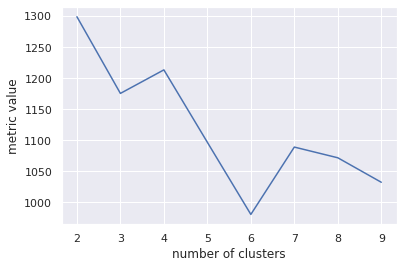

FILE PATH: /content/drive/My Drive/Colab Notebooks/data-project5/13.txt

INPUT DATA


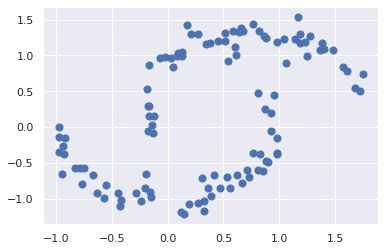


DATA AFTER CLUSTERIZATION

ITERATION 0
init centers: [[0.57173357 0.92761697]
 [0.41342918 0.        ]]


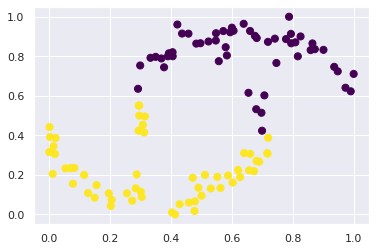

label: 0 - dot: [0.99039942 0.62275478]
label: 1 - dot: [0.12729161 0.10816473]
label: 1 - dot: [0.28428011 0.13188035]
label: 0 - dot: [0.7777544  0.88707361]
label: 1 - dot: [0.30714695 0.45323322]
label: 1 - dot: [0.02074531 0.38689764]
...

ITERATION 1
init centers: [[0.57173357 0.92761697]
 [0.7163286  0.30967546]]


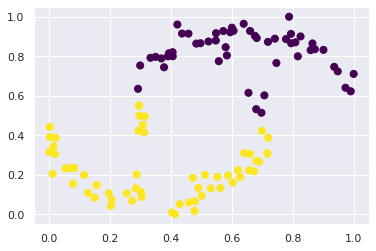

label: 0 - dot: [0.99039942 0.62275478]
label: 1 - dot: [0.12729161 0.10816473]
label: 1 - dot: [0.28428011 0.13188035]
label: 0 - dot: [0.7777544  0.88707361]
label: 1 - dot: [0.30714695 0.45323322]
label: 1 - dot: [0.02074531 0.38689764]
...

ITERATION 2
init centers: [[0.53062786 0.13138109]
 [0.45726511 0.91445295]]


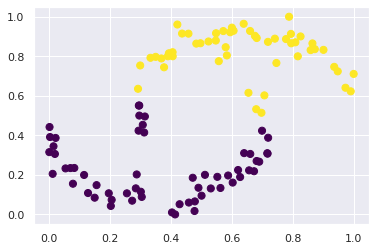

label: 1 - dot: [0.99039942 0.62275478]
label: 0 - dot: [0.12729161 0.10816473]
label: 0 - dot: [0.28428011 0.13188035]
label: 1 - dot: [0.7777544  0.88707361]
label: 0 - dot: [0.30714695 0.45323322]
label: 0 - dot: [0.02074531 0.38689764]
...

best cluster index: 1

best cluster score: 137.2960430504595

CALINSKI HARABASZ INDEX
my metric: 183.62234431377368 - sklearn metric: 183.62234431377368
my metric: 131.64558089633402 - sklearn metric: 131.64558089633402
my metric: 185.6392803811234 - sklearn metric: 185.6392803811234
my metric: 173.33632115076617 - sklearn metric: 173.33632115076617
my metric: 197.50553265968233 - sklearn metric: 197.50553265968233
my metric: 206.5244300915185 - sklearn metric: 206.5244300915185
my metric: 204.45345251557444 - sklearn metric: 204.45345251557444
my metric: 241.4276096833532 - sklearn metric: 241.4276096833532


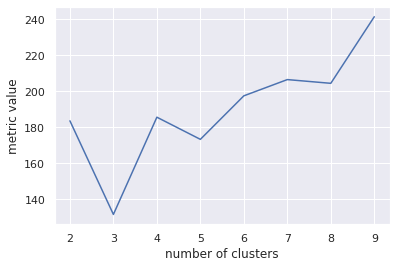

FILE PATH: /content/drive/My Drive/Colab Notebooks/data-project5/14.txt

INPUT DATA


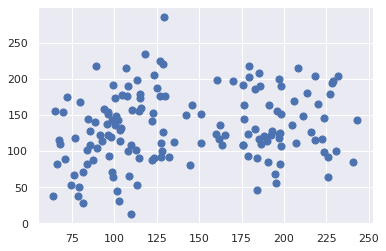


DATA AFTER CLUSTERIZATION

ITERATION 0
init centers: [[0.54853714 0.45288312]
 [0.93167042 0.31920826]]


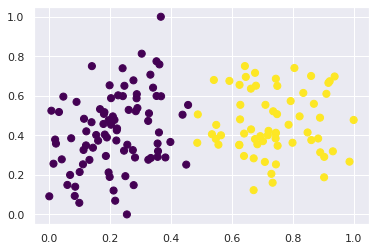

label: 0 - dot: [0.2202818  0.37388822]
label: 1 - dot: [0.6268227  0.48070005]
label: 0 - dot: [0.07192329 0.38525444]
label: 0 - dot: [0.09860703 0.05857054]
label: 0 - dot: [0.12161237 0.42028502]
label: 1 - dot: [0.91704373 0.66544164]
...

ITERATION 1
init centers: [[0.15407001 0.4018581 ]
 [0.33212596 0.70693579]]


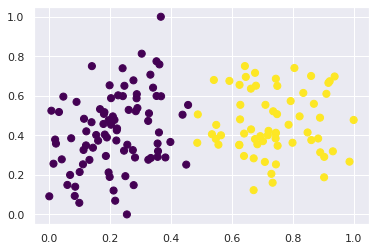

label: 0 - dot: [0.2202818  0.37388822]
label: 1 - dot: [0.6268227  0.48070005]
label: 0 - dot: [0.07192329 0.38525444]
label: 0 - dot: [0.09860703 0.05857054]
label: 0 - dot: [0.12161237 0.42028502]
label: 1 - dot: [0.91704373 0.66544164]
...

ITERATION 2
init centers: [[0.63965587 0.29563573]
 [0.73560634 0.52178878]]


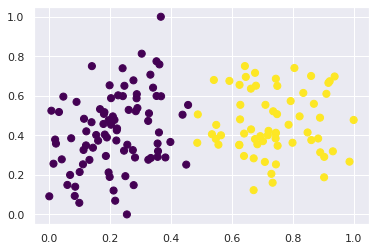

label: 0 - dot: [0.2202818  0.37388822]
label: 1 - dot: [0.6268227  0.48070005]
label: 0 - dot: [0.07192329 0.38525444]
label: 0 - dot: [0.09860703 0.05857054]
label: 0 - dot: [0.12161237 0.42028502]
label: 1 - dot: [0.91704373 0.66544164]
...

best cluster index: 0

best cluster score: 360.5616940831796

CALINSKI HARABASZ INDEX
my metric: 214.1944021683794 - sklearn metric: 214.1944021683794
my metric: 187.86807819421264 - sklearn metric: 187.86807819421264
my metric: 184.83238019991128 - sklearn metric: 184.83238019991128
my metric: 171.51257975270818 - sklearn metric: 171.51257975270818
my metric: 156.36234087520995 - sklearn metric: 156.36234087520995
my metric: 163.6527400708019 - sklearn metric: 163.6527400708019
my metric: 147.04983318666538 - sklearn metric: 147.04983318666538
my metric: 155.7174615211444 - sklearn metric: 155.7174615211444


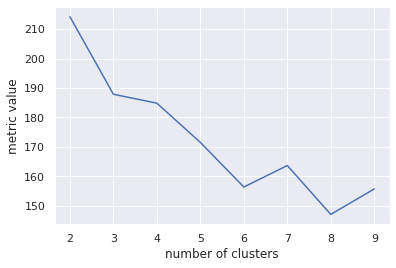

In [70]:
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.spatial.distance import pdist

for i in range(1, 15):
  data_file_path = '/content/drive/My Drive/Colab Notebooks/data-project5/' + str(i) + '.txt'
  df = pd.read_table(data_file_path, header = None, sep = '\s+')

  print('FILE PATH: ' + data_file_path + '\n')
  print('INPUT DATA')
  plt.scatter(df[0], df[1], s=50, cmap='viridis')
  plt.show()

  X = normalize(df)

  print('\nDATA AFTER CLUSTERIZATION')

  clusters_data = {}

  for i in range(0, 3):
    print('\nITERATION ' + str(i))
    centers, labels = KMeans(X, 2, debug=True)
    clusters_data[i] = (centers, labels)

    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    plt.show()

    for i, x in enumerate(X):
      print('label: ' + str(labels[i]) + ' - dot: ' + str(x))
      if i == 5:
        print("...")
        break

  best_cluster_index = 0
  best_cluster_score = 10**10
  for key, cluster_data in clusters_data.items():

    arr = []
    for label in cluster_data[1]:
      pairs = np.where(cluster_data[1] == label)
      pairs_distance = (pdist(X[pairs[0]]))**2
      within_cluster_distance = np.sum(pairs_distance, axis=0)
      arr.append(within_cluster_distance)

      score = np.sum(arr)

      if score < best_cluster_score:
        best_cluster_index = key
        best_cluster_score = score

  print('\nbest cluster index: ' + str(best_cluster_index))
  print('\nbest cluster score: ' + str(best_cluster_score))

  print('\nCALINSKI HARABASZ INDEX')
  my_metrics = {}
  for n_clusters in range(2, 10):
      centers, labels = KMeans(X, n_clusters)
      my_metrics[n_clusters] = calinski_harabasz_index(X, labels)

      print('my metric: ' + str(calinski_harabasz_index(X, labels)) +
            ' - sklearn metric: ' + str(metrics.calinski_harabasz_score(X, labels)))
      
  plt.plot(list(my_metrics.keys()), list(my_metrics.values()))
  plt.xlabel("number of clusters")
  plt.ylabel("metric value")
  plt.show()